# School - YRBS: Parents

As it said in issue [#12](https://github.com/mozilla-outreachy-datascience/outreachy-datascience/issues/12), there are students that gave informations about their caregivers, e.g. ```my mother and father```, ```my mother and a step parent```, ```my mother only```. And, some of students have missing information about it.

The goal is to separate information, as ```my mother and my father``` in to differents informations (```mother```, ```father```), for all the values in the column ```parents``` , furthermore show the distribution of each single caregiver.

This file is solution proposal of the issue. 

## Import dependancy and Reading CSV

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
school_df = pd.read_csv("../school-yrbs/Somerville_High_School_YRBS_Raw_Data_2002-2016.csv")
school_df

,survey,id,age,gender,grade,race,language,live_us,parents,home,...,chew_age,fr_smok,fr_alc,fr_pot,fr_oth,talk_sex,study_7,read_7,work_7,stren_7
0,SH16,English - SHS,15 years old,Female,Sophomore - 10th,Hispanic or Latino,English,I have always lived in the United States,My mother and my father,A house/condo/apartment owned/rented by my par...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SH16,2,16 years old,Male,Sophomore - 10th,Hispanic or Latino,English,Between 1-3 years,My mother and a step-parent,A house/condo/apartment owned/rented by my par...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SH16,3,16 years old,Male,Sophomore - 10th,Black,English,I have always lived in the United States,My mother and my father,A house/condo/apartment owned/rented by my par...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SH16,4,18 years old or older,Male,Senior - 12th,Hispanic or Latino,Spanish,"More than 6 years, but not my whole life",My mother and my father,A house/condo/apartment owned/rented by my par...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SH16,5,18 years old or older,Male,Senior - 12th,Hispanic or Latino,Spanish,I have always lived in the United States,My mother and my father,A house/condo/apartment owned/rented by my par...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,SH16,6,18 years old or older,Male,Senior - 12th,Hispanic or Latino,Portuguese,"More than 6 years, but not my whole life",My mother and my father,A house/condo/apartment owned/rented by my par...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,SH16,8,18 years old or older,Male,Senior - 12th,Hispanic or Latino,Spanish,"More than 6 years, but not my whole life",My mother only,A house/condo/apartment owned/rented by my par...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,SH16,10,18 years old or older,Male,Senior - 12th,White,English,I have always lived in the United States,My mother only,A house/condo/apartment owned/rented by my par...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,SH16,12,18 years old or older,Male,Senior - 12th,Asian or other Pacific Islander,Another language,Between 1-3 years,My mother and my father,A house/condo/apartment owned/rented by my par...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,SH16,13,17 years old,Male,Senior - 12th,Other,Spanish,I have always lived in the United States,My mother and my father,A house/condo/apartment owned/rented by my par...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Preprocessing

The inicial action is to replace empty fields with "Unknown" for a better use.

In [3]:
# Before preprocessing
school_df.tail()

,survey,id,age,gender,grade,race,language,live_us,parents,home,...,chew_age,fr_smok,fr_alc,fr_pot,fr_oth,talk_sex,study_7,read_7,work_7,stren_7
8866,SH06,2032,15 years old,Female,Freshman - 9th,White,English,,,A house/condo/apartment owned/rented by my par...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8867,SH06,2033,14 years old,Female,Freshman - 9th,White,English,,,A house/condo/apartment owned/rented by my par...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8868,SH06,2034,14 years old,Female,Freshman - 9th,Hispanic or Latino,Spanish,,,A house/condo/apartment owned/rented by my par...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8869,SH06,2035,17 years old,Male,Senior - 12th,,English,,,A house/condo/apartment owned/rented by my par...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8870,SH06,2036,17 years old,Female,Junior - 11th,Black,Portuguese,,,A house/condo/apartment owned/rented by my par...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# After preprocessing
school_df.replace(regex=r'^\s*$', value='Unknown', inplace=True)
school_df.tail()

,survey,id,age,gender,grade,race,language,live_us,parents,home,...,chew_age,fr_smok,fr_alc,fr_pot,fr_oth,talk_sex,study_7,read_7,work_7,stren_7
8866,SH06,2032,15 years old,Female,Freshman - 9th,White,English,Unknown,Unknown,A house/condo/apartment owned/rented by my par...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8867,SH06,2033,14 years old,Female,Freshman - 9th,White,English,Unknown,Unknown,A house/condo/apartment owned/rented by my par...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8868,SH06,2034,14 years old,Female,Freshman - 9th,Hispanic or Latino,Spanish,Unknown,Unknown,A house/condo/apartment owned/rented by my par...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8869,SH06,2035,17 years old,Male,Senior - 12th,Unknown,English,Unknown,Unknown,A house/condo/apartment owned/rented by my par...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8870,SH06,2036,17 years old,Female,Junior - 11th,Black,Portuguese,Unknown,Unknown,A house/condo/apartment owned/rented by my par...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Using pandas function ```get_dummies```, it's defined that each value in "parents" column is a dummy variable.

In other words, the original column is split in K variables, where K is the number of values in it. Then, each variable receives 0 or 1, depending on if this variable shows up 01in the original line.

In [5]:
# Only for show how the table of dummy variables works
dummies = pd.get_dummies(school_df.parents)
dummies

,"Another relative (like a grandparent, aunt/uncle)",Foster parent(s),My father and a step-parent,My father only,My mother and a step-parent,My mother and my father,My mother only,Someone else not on this list,Unknown
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,1,0,0,0


If We get the line 1 as example, We can see that only the column ```My mother and my father``` has the value 1. That's because in the original column ```parents```, in this specific line, it is filled with ```My mother and my father```

Then, with a list of unique values in the column ```parents```, It creates a new column with the values of similar columns, e.g. ```My mother and my father```, ```My mother only``` and ```My mother and a step-parent```, into a single column ```Mother```

In [6]:
dummies = pd.get_dummies(school_df.parents)
parents_values = school_df['parents'].unique()

mother_list = []
father_list = []
step_list = []

for value in parents_values:
    if value.find('mother') != -1:
        mother_list.append(value)
    if value.find('father') != -1:
        father_list.append(value)
    if value.find('step-parent') != -1:
        step_list.append(value)

lists = [mother_list, father_list, step_list, 'Mother', 'Father', 'Step Parent']
for i in range(0,3):
    dummies = (pd.concat([dummies, dummies[lists[i]].sum(1)], axis=1)).rename(columns={0:lists[i+3]})

# To show the result
dummies


,"Another relative (like a grandparent, aunt/uncle)",Foster parent(s),My father and a step-parent,My father only,My mother and a step-parent,My mother and my father,My mother only,Someone else not on this list,Unknown,Mother,Father,Step Parent
0,0,0,0,0,0,1,0,0,0,1,1,0
1,0,0,0,0,1,0,0,0,0,1,0,1
2,0,0,0,0,0,1,0,0,0,1,1,0
3,0,0,0,0,0,1,0,0,0,1,1,0
4,0,0,0,0,0,1,0,0,0,1,1,0
5,0,0,0,0,0,1,0,0,0,1,1,0
6,0,0,0,0,0,0,1,0,0,1,0,0
7,0,0,0,0,0,0,1,0,0,1,0,0
8,0,0,0,0,0,1,0,0,0,1,1,0
9,0,0,0,0,0,1,0,0,0,1,1,0


# Caregivers Distribution

We can see below, the distribution of caregivers, after the data frame treatement. For example, ```2873``` students has their mother and father as caregivers. But, ```4392``` students have their mother (by herself, or not) as caregiver.

In [300]:
distribution = dummies.isin([1]).sum(axis=0)
distribution.sort_values(ascending=False)

Mother                                               4392
Unknown                                              3917
Father                                               3101
My mother and my father                              2873
My mother only                                       1130
Step Parent                                           465
My mother and a step-parent                           389
Another relative (like a grandparent, aunt/uncle)     226
My father only                                        152
Someone else not on this list                          92
My father and a step-parent                            76
Foster parent(s)                                       16
dtype: int64

## Bar Chart



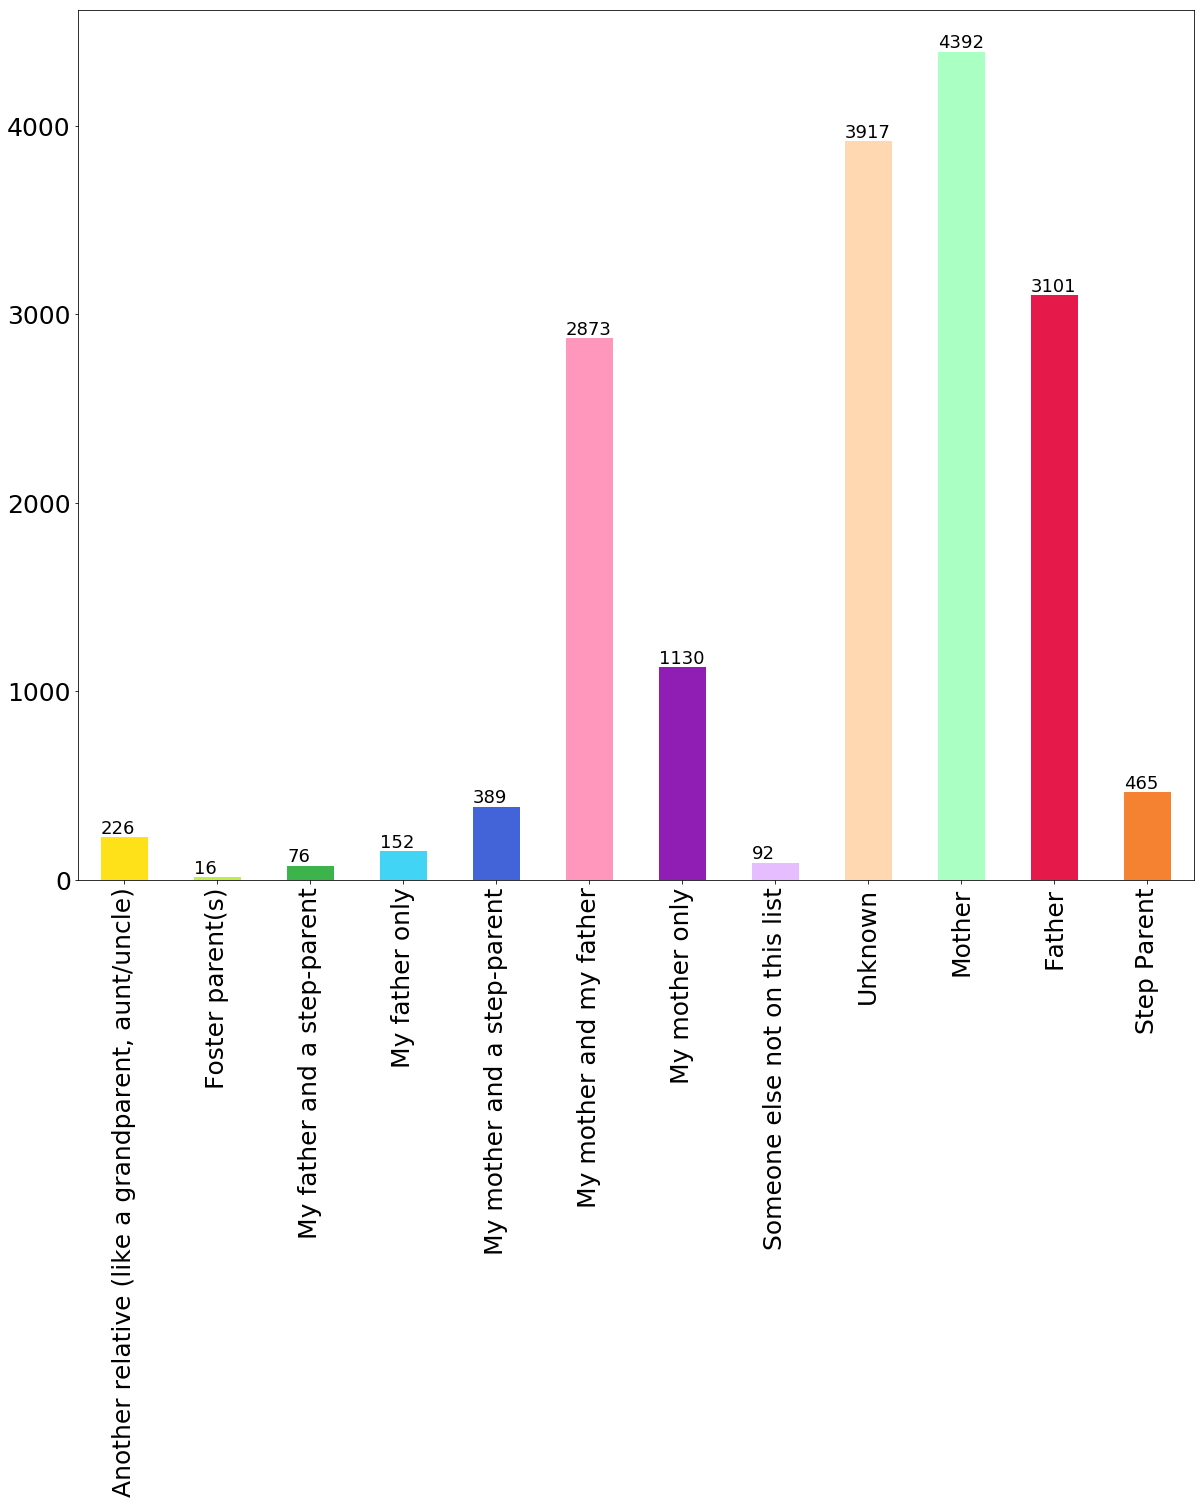

In [301]:
colors = ['#ffe119', '#bfef45', '#3cb44b', '#42d4f4', '#4363d8', '#FF97BC','#911eb4', '#e6beff', '#ffd8b1', '#aaffc3','#e6194B', '#f58231' ]
bar = distribution.plot.bar(figsize=(20,16), fontsize=25, color=colors)
for i in bar.patches:
    bar.text(i.get_x(), i.get_height()+20, \
        str(round((i.get_height()), 2)), fontsize=18)

## Pie Chart

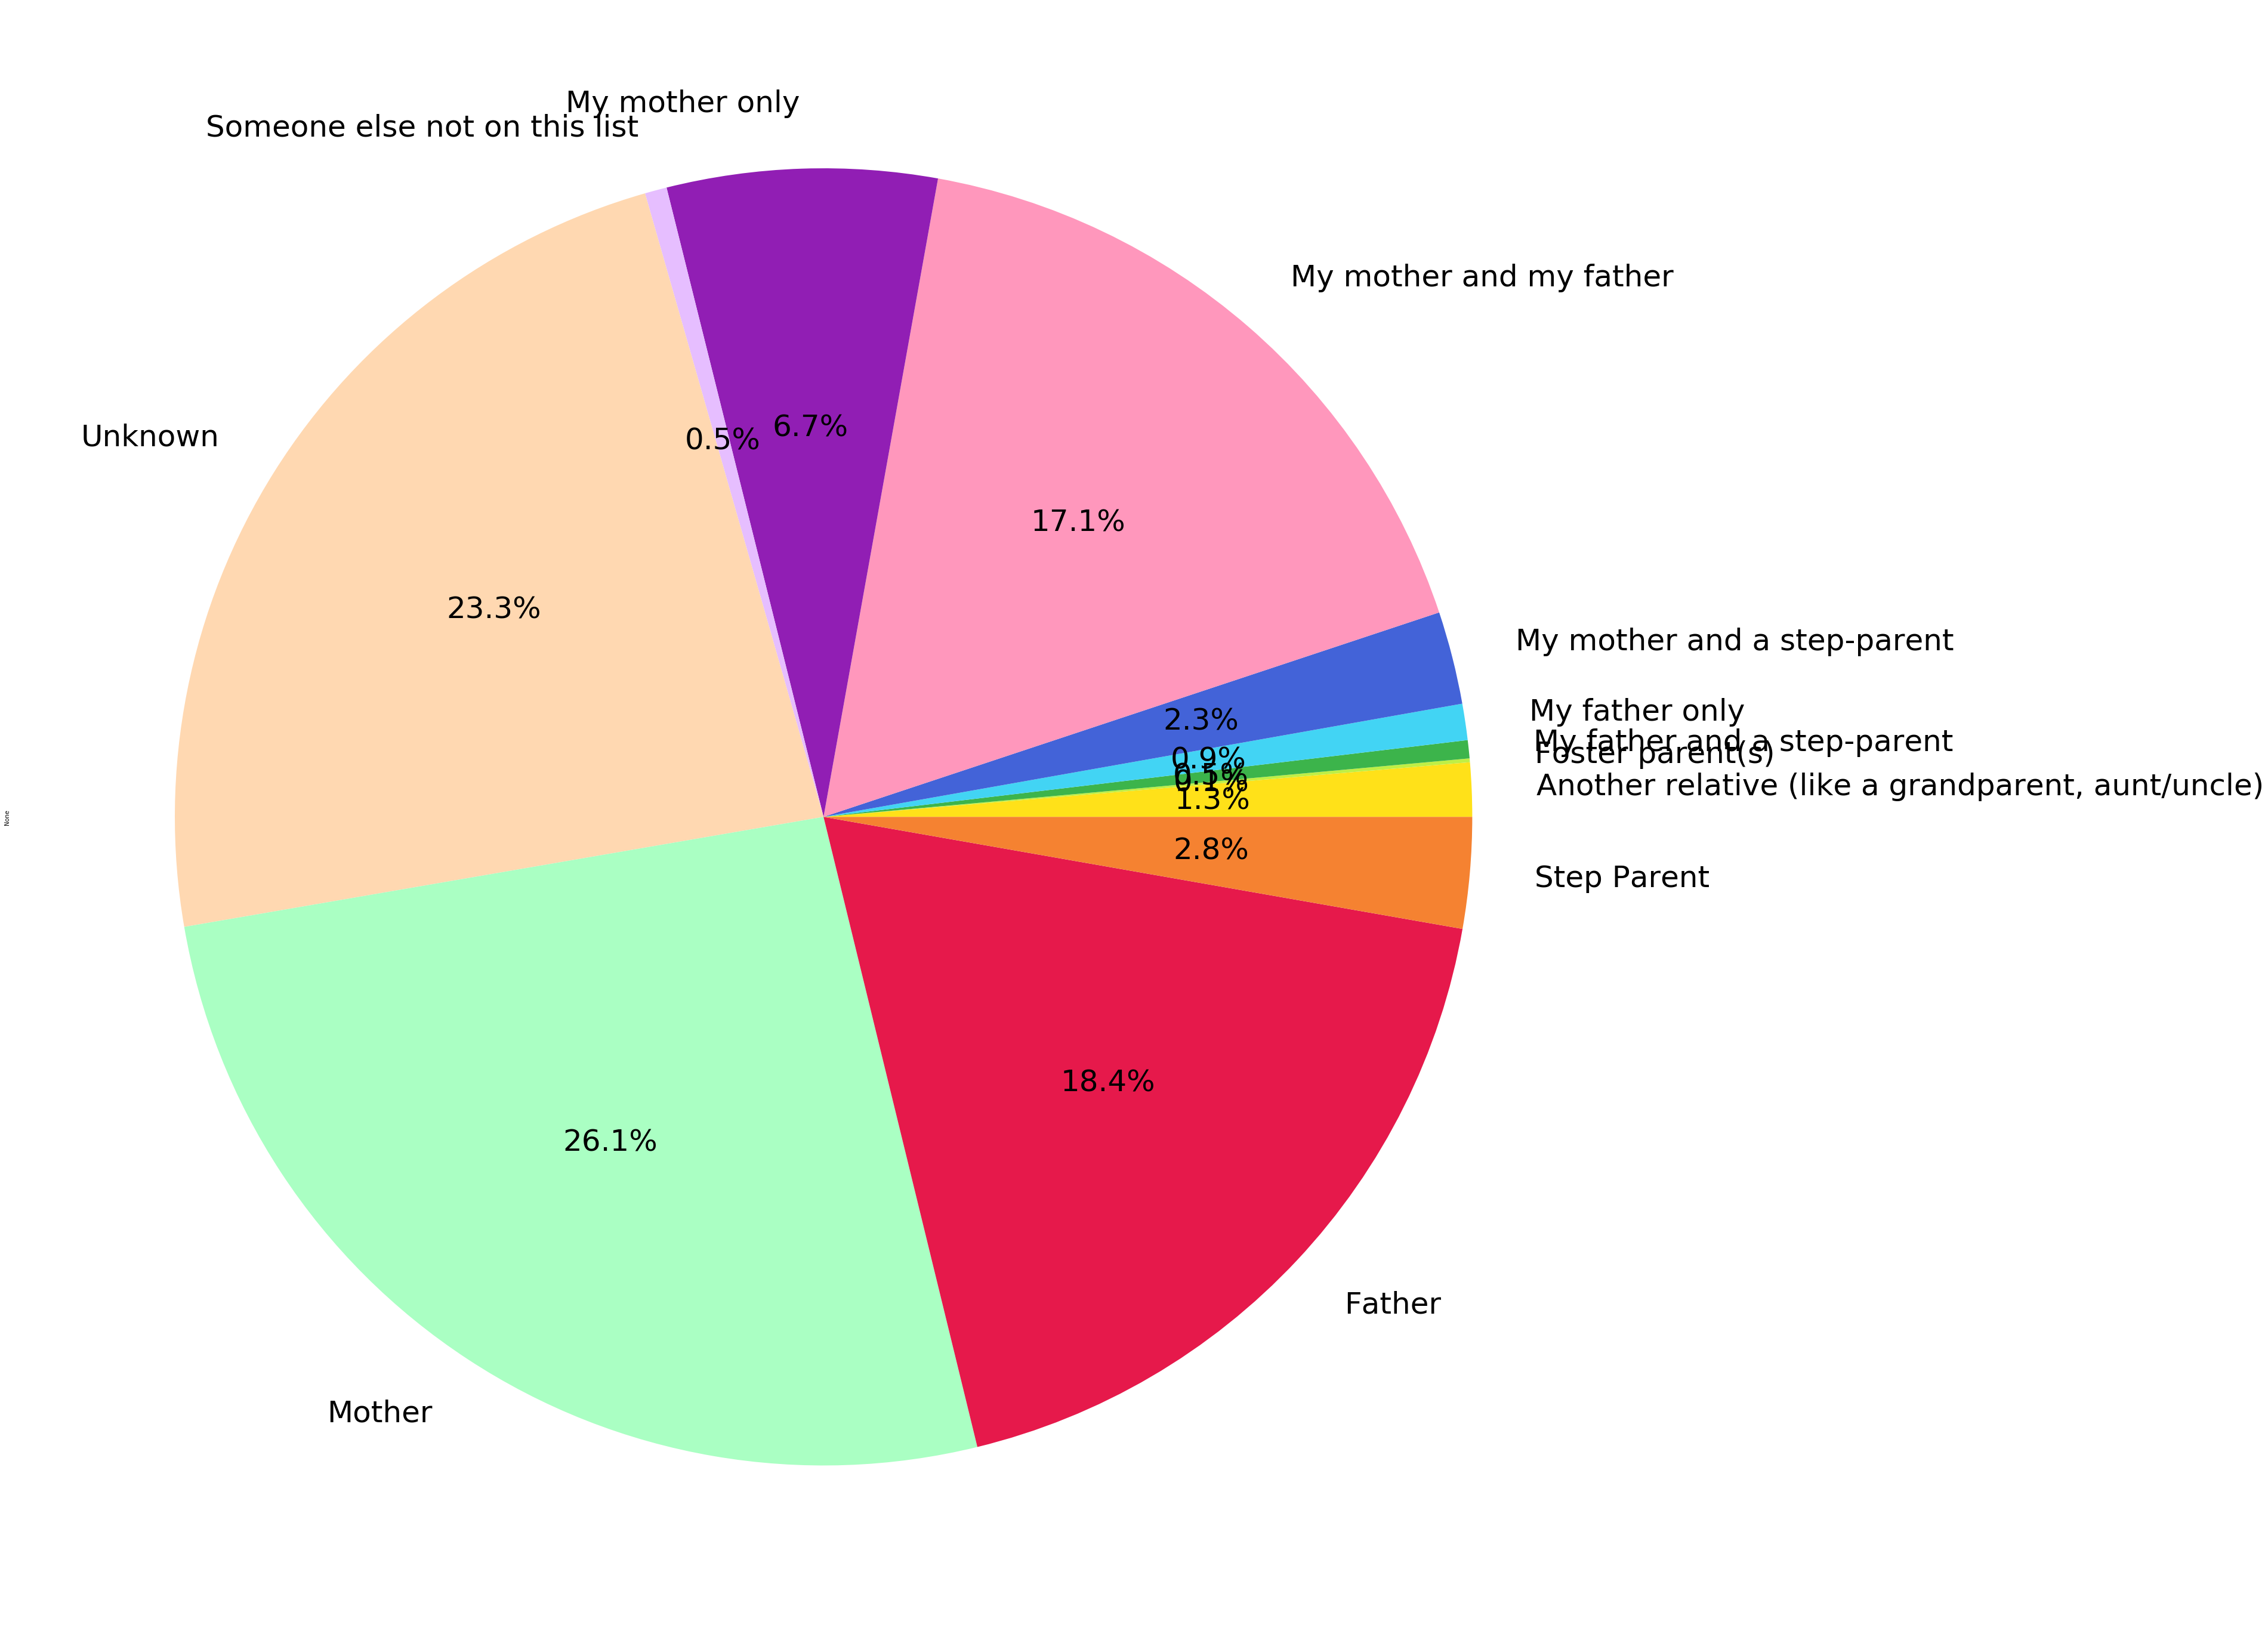

In [302]:
pie = distribution.plot.pie(subplots=True,figsize=(50, 50),fontsize=50,autopct='%1.1f%%', colors=colors)
